1. **Complement Rule**

- **Formula**: **P(not A)=1−P(A)**

- **Meaning**: The probability that event A does not occur equals 1 minus the probability that it does occur.


2. **Rule for Equally Likely Outcomes**

- **Formula**:**P(A)=Total number of equally likely outcomes/Number of outcomes in A**


- **Meaning**: If every outcome in a sample space is equally likely, then the probability of event A is just “favorable outcomes ÷ total outcomes.”



3. **Addition Rule** (for mutually exclusive events)

- **Formula**: **P(A or B)=P(A)+P(B)**

- **Condition**: A and B must be mutually exclusive (cannot happen at the same time).

- **Meaning**: The probability of A or B is the sum of their individual probabilities.


4. **Multiplication Rule** (for **independent** events)

- **Formula**: **P(A and B)=P(A)×P(B)**

- **Condition**: A and B must be independent (one event happening does not affect the other).

- **Meaning**: The probability that both events occur equals the product of their probabilities.


### 1. Complement Rule

In [1]:
# Example: Probability of NOT rolling a 6 on a fair die
total_outcomes = 6
p_roll_6 = 1 / total_outcomes
p_not_roll_6 = 1 - p_roll_6

print("P(rolling a 6):", p_roll_6)
print("P(not rolling a 6):", p_not_roll_6)

P(rolling a 6): 0.16666666666666666
P(not rolling a 6): 0.8333333333333334


### 2. Equally Likely Outcomes Rule

In [3]:
# Example: Probability of rolling an even number on a die
total_outcomes = 6
favorable_outcomes = 3  # {2, 4, 6}
p_even = favorable_outcomes / total_outcomes

print("P(rolling an even number):", p_even)

P(rolling an even number): 0.5


### 3. Addition Rule (Mutually Exclusive Events)

In [4]:
# Example: Probability of rolling a 1 OR a 2 on a die
p_roll_1 = 1/6
p_roll_2 = 1/6

p_1_or_2 = p_roll_1 + p_roll_2  # mutually exclusive
print("P(rolling a 1 or 2):", p_1_or_2)

P(rolling a 1 or 2): 0.3333333333333333


### 4. Multiplication Rule (Independent Events)

In [5]:
# Example: Probability of getting two heads in two coin flips
p_head = 0.5
p_two_heads = p_head * p_head  # independent

print("P(two heads):", p_two_heads)

P(two heads): 0.25


### Simulation results (100,000 trials)

In [6]:
import random
import matplotlib.pyplot as plt

In [7]:
trials = 100000

In [9]:
die_rolls = [random.randint(1, 6) for _ in range(trials)]

In [10]:
# -------------------------------
# 1. Complement Rule - Not rolling a 6 on a die
# -------------------------------
p_roll_6_sim = die_rolls.count(6) / trials
p_not_roll_6_sim = 1 - p_roll_6_sim
p_roll_6_sim,p_not_roll_6_sim

(0.16752, 0.83248)

In [11]:
# -------------------------------
# 2. Equally Likely Outcomes - Rolling an even number
# -------------------------------
p_even_sim = sum(1 for roll in die_rolls if roll % 2 == 0) / trials
p_even_sim

0.49973

In [13]:
# -------------------------------
# 3. Addition Rule - Rolling a 1 OR 2
# -------------------------------
p_1_or_2_sim = sum(1 for roll in die_rolls if roll in [1, 2]) / trials
p_1_or_2_sim

0.33597

In [14]:
# -------------------------------
# 4. Multiplication Rule - Two heads in two coin flips
# -------------------------------
coin_flips = [(random.choice(['H', 'T']), random.choice(['H', 'T'])) for _ in range(trials)]
p_two_heads_sim = sum(1 for flip in coin_flips if flip == ('H', 'H')) / trials
p_two_heads_sim

0.2514

In [16]:
# Store results
simulated = {
    "Complement (not 6)": p_not_roll_6_sim,
    "Equally Likely (even)": p_even_sim,
    "Addition (1 or 2)": p_1_or_2_sim,
    "Multiplication (two heads)": p_two_heads_sim
}

# -------------------------------
# Theoretical values
# -------------------------------
theoretical = {
    "Complement (not 6)": 5/6,
    "Equally Likely (even)": 3/6,
    "Addition (1 or 2)": 2/6,
    "Multiplication (two heads)": 0.25
}

In [17]:
# -------------------------------
# Print Results
# -------------------------------
print("Simulation Results (100,000 trials):")
for key in simulated:
    print(f"{key}: Theoretical = {theoretical[key]:.4f}, Simulated = {simulated[key]:.4f}")

#

Simulation Results (100,000 trials):
Complement (not 6): Theoretical = 0.8333, Simulated = 0.8325
Equally Likely (even): Theoretical = 0.5000, Simulated = 0.4997
Addition (1 or 2): Theoretical = 0.3333, Simulated = 0.3360
Multiplication (two heads): Theoretical = 0.2500, Simulated = 0.2514


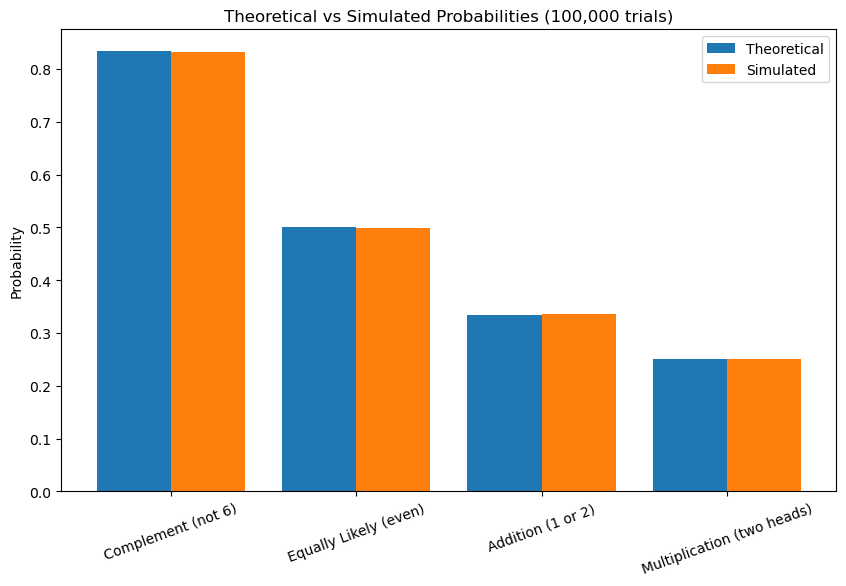

In [18]:
# -------------------------------
# Plot Results
# -------------------------------
labels = list(theoretical.keys())
theoretical_values = [theoretical[label] for label in labels]
simulated_values = [simulated[label] for label in labels]

x = range(len(labels))
plt.figure(figsize=(10,6))
plt.bar(x, theoretical_values, width=0.4, label="Theoretical", align="center")
plt.bar([i+0.4 for i in x], simulated_values, width=0.4, label="Simulated", align="center")

plt.xticks([i+0.2 for i in x], labels, rotation=20)
plt.ylabel("Probability")
plt.title("Theoretical vs Simulated Probabilities (100,000 trials)")
plt.legend()
plt.show()

### Problem: What’s the probability of getting at least one 6 in three rolls of a fair die?

## **Step 1: Why not the Addition Rule?**

- You might think: “P(roll a 6 on the 1st roll OR 2nd OR 3rd).”

- But the events overlap (e.g., you could roll a 6 on both the 1st and 2nd).
That makes direct addition complicated.

**Step 2: Use the Complement Rule**

- It’s much easier to calculate the opposite event:
No 6 in all three rolls.

- Then apply the complement rule: **P(at least one 6)=1−P(no 6s)**

**Step 3: Probability of “No 6” in One Roll**

- On a single roll: **P(no 6)= 5/6**

**Step 4: Use Multiplication Rule for Three Rolls**

- Rolls are independent events.

- So: **P(no 6 in 3 rolls)=(5/6)^3

**Step 5: Apply Complement**

- Now: P(at least one 6) = 1−(5/6)^3 ≈ 42.13%


In [19]:
import random

In [20]:
def prob_at_least_one_theory(p, n):
    """
    Theoretical probability of at least one success in n trials.
    p = probability of success in one trial
    n = number of trials
    """
    return 1 - (1 - p)**n

In [21]:
def prob_at_least_one_sim(p, n, trials=100000):
    """
    Simulated probability of at least one success in n trials.
    p = probability of success in one trial
    n = number of trials
    trials = number of experiments to run
    """
    success_count = 0
    for _ in range(trials):
        # Perform n independent trials
        outcomes = [random.random() < p for _ in range(n)]
        if any(outcomes):  # at least one success
            success_count += 1
    return success_count / trials

In [43]:
# Example 1: At least one 6 in 3 rolls of a die
p_die = 1/6
n_rolls = 3
theory_probs = prob_at_least_one_theory(p_die, n_rolls)
sim_probs = prob_at_least_one_sim(p_die, n_rolls)
print("At least one 6 in 3 rolls (theory):", theory_probs)
print("At least one 6 in 3 rolls (sim):   ", sim_probs)

At least one 6 in 3 rolls (theory): 0.42129629629629617
At least one 6 in 3 rolls (sim):    0.42344


In [23]:
# Example 2: At least one head in 5 coin flips
p_coin = 0.5
n_flips = 5
print("\nAt least one head in 5 flips (theory):", prob_at_least_one_theory(p_coin, n_flips))
print("At least one head in 5 flips (sim):   ", prob_at_least_one_sim(p_coin, n_flips))


At least one head in 5 flips (theory): 0.96875
At least one head in 5 flips (sim):    0.96851


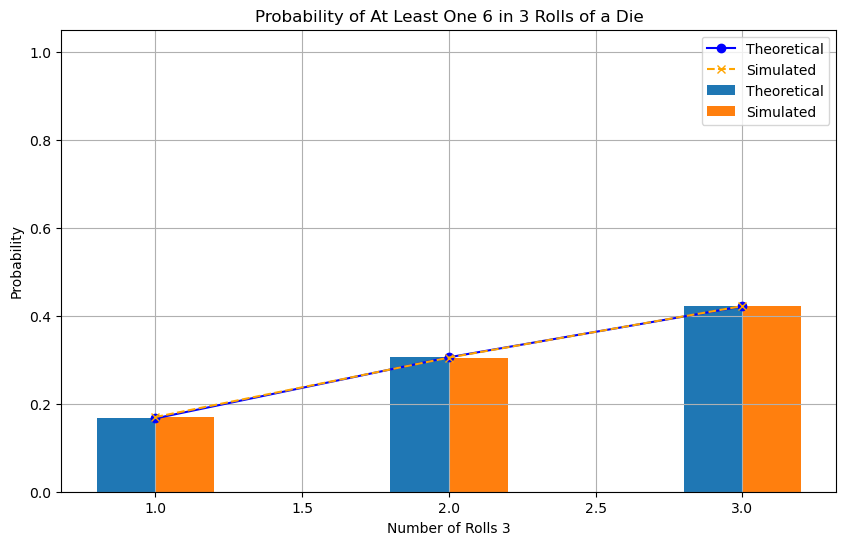

In [48]:
# Plot
# Theoretical values
theory_probs = [prob_at_least_one_theory(p_die, n) for n in range(1, n_rolls+1)]

# Simulated values
sim_probs = [prob_at_least_one_sim(p_die, n) for n in range(1, n_rolls+1)]
plt.figure(figsize=(10,6))
plt.plot(range(1, n_rolls+1), theory_probs, marker='o', label="Theoretical", color="blue")
plt.plot(range(1, n_rolls+1), sim_probs, marker='x', linestyle="--", label="Simulated", color="orange")
x = range(len(theory_probs))
w = 0.2
plt.bar([1+i-w/2 for i in x], theory_probs, width=w, label="Theoretical", align="center")
plt.bar([1+i+w/2 for i in x], sim_probs, width=w, label="Simulated", align="center")

plt.title(f"Probability of At Least One 6 in {n_rolls} Rolls of a Die")
plt.xlabel(f"Number of Rolls {n_rolls}")
plt.ylabel("Probability")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()
# theory_probs,sim_probs